# ***BOSTON_HOUSING***

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
df.isna().sum()
df = df.dropna(axis=1)

In [26]:
df.isna().sum()

,0
NOX,0
RM,0
DIS,0
RAD,0
TAX,0
PTRATIO,0
B,0
MEDV,0


In [27]:
x = df.drop('MEDV', axis =1)
y = df['MEDV']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state= 45, test_size = 0.2)

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)

In [30]:
from keras.models import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(128, input_shape=x_train[0].shape, activation='relu',name='Dense_1'))
model.add(Dense(64,activation="relu",name="Dense_2"))
model.add(Dense(1, activation="linear", name="Dense_output"))
model.compile(optimizer='adam',loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(x_train,y_train, epochs=200, validation_split=0.05,verbose=1)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 543.7844 - mae: 21.6547 - val_loss: 445.8968 - val_mae: 18.6788
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 555.3074 - mae: 21.5771 - val_loss: 394.3329 - val_mae: 17.1755
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 474.3027 - mae: 19.6377 - val_loss: 322.1202 - val_mae: 14.9015
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 343.6087 - mae: 16.2927 - val_loss: 231.8298 - val_mae: 11.8254
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 252.9365 - mae: 13.2199 - val_loss: 153.9330 - val_mae: 9.5189
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 145.7739 - mae: 9.3516 - val_loss: 135.2301 - val_mae: 9.3152
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 103.6226 - mae: 7.3872 - val_loss: 145.2184 - val_mae: 9.8094
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 99.3361 - mae: 7.3655 - val_loss: 124.6083 - val_mae: 8.9966
Epoch 9/200
12/12 ━━━━

In [34]:
# mse, mae = model.evaluate(x_test)
# print(mse,"\n",mae)
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [35]:
from sklearn.metrics import accuracy_score, r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.5497098342401412


# ***IMDB_REVIEW***

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/datasets/IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

In [5]:
max_words = 1000
max_len = 150

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['review'])
x = tokenizer.texts_to_sequences(df['review'])
# print(x)
x = pad_sequences(x,maxlen=max_len, padding='post', truncating='post')
# print(x)
y = np.array(df['sentiment'].map({'positive':1,'negative':0}))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=45, test_size=0.3)

In [7]:
model = Sequential()
model.add(Embedding(input_dim=max_words,output_dim=64,input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size= 32)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.7046 - loss: 0.5329 - val_accuracy: 0.8248 - val_loss: 0.3779
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8861 - loss: 0.2697 - val_accuracy: 0.8123 - val_loss: 0.4237
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9596 - loss: 0.1173 - val_accuracy: 0.8000 - val_loss: 0.6074
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9880 - loss: 0.0430 - val_accuracy: 0.7979 - val_loss: 0.8725
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.7995 - val_loss: 1.0536
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9936 - loss: 0.0217 - val_accuracy: 0.7948 - val_loss: 1.1634
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.7906 - val_loss: 1.2644
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.9948 -

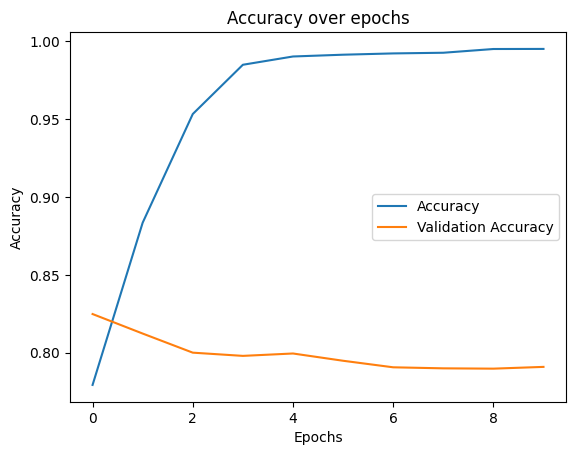

In [9]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test,y_test)
print("Accuracy: ", accuracy)

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7916 - loss: 1.4473
Accuracy:  0.7908666729927063


In [11]:
def predict_sentiment(review):
  seq = tokenizer.texts_to_sequences([review])
  pad_seq = pad_sequences(seq, maxlen = max_len, padding='post', truncating='post')
  pred = model.predict(pad_seq)[0][0]
  sentiment = "positive" if pred > 0.5 else "negative"
  return f'Predicted Sentiment: {sentiment}'


In [12]:
predict_sentiment("The movie was very good and amazing. I would  recommend it to anyone. It is 100 out of 10")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


'Predicted Sentiment: positive'

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


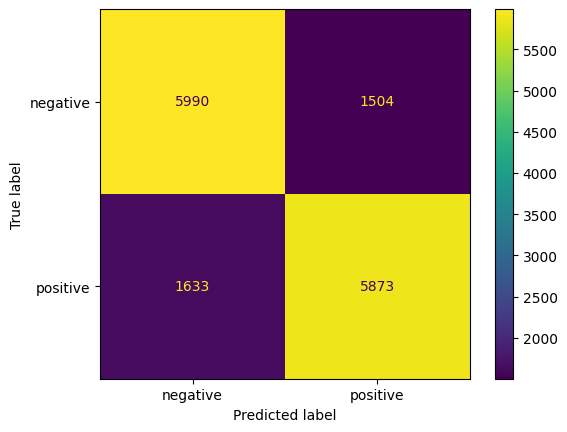

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred=  model.predict(x_test)
y_pred_class = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test,y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['negative','positive'])
disp.plot()

# ***FASHION_CLASSIFICATION***

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('/content/drive/MyDrive/datasets/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/datasets/fashion-mnist_test.csv')

In [17]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
x_train = train_df.drop(columns=['label']).values
y_train = train_df['label'].values

x_test = test_df.drop(columns=['label']).values
y_test = test_df['label'].values

In [19]:
labels = ['Tshirt','Trouser', 'Pullover','Dress', 'Coat', 'Sandal','Shirt',' Sneaker', 'Bag','Ankle boots']

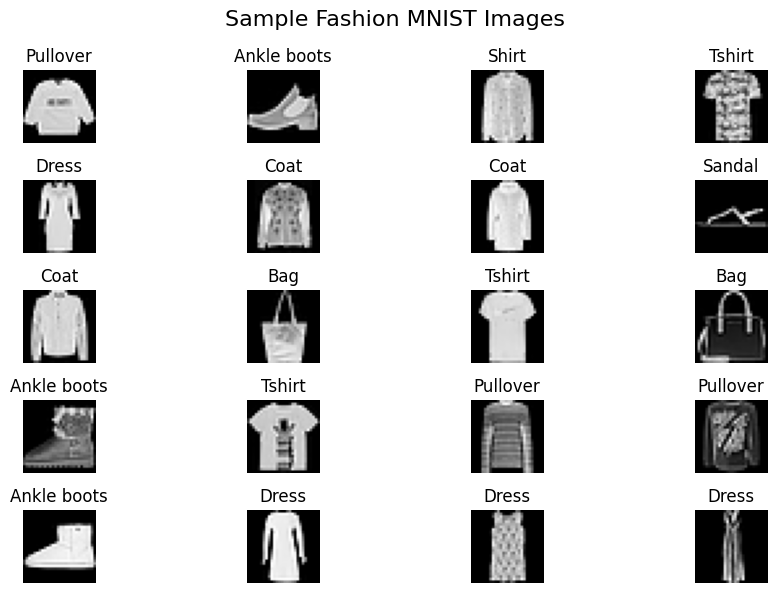

In [20]:
plt.figure(figsize=(10,6))

for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='grey')
  plt.title(labels[y_train[i]])
  plt.axis('off')
plt.suptitle("Sample Fashion MNIST Images", fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
x_train = x_train.reshape(-1,28,28,1) /255.0
x_test = x_test.reshape(-1,28,28,1) /255.0

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,808 (882.06 KB)

 Trainable params: 225,808 (882.06 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(x_train,y_train,epochs=8, batch_size=64, validation_data=(x_test,y_test))

Epoch 1/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.7139 - loss: 0.8090 - val_accuracy: 0.8613 - val_loss: 0.3776
Epoch 2/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 109s 89ms/step - accuracy: 0.8673 - loss: 0.3689 - val_accuracy: 0.8895 - val_loss: 0.3050
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 59ms/step - accuracy: 0.8844 - loss: 0.3160 - val_accuracy: 0.8958 - val_loss: 0.2824
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.8971 - loss: 0.2804 - val_accuracy: 0.9052 - val_loss: 0.2590
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 99s 76ms/step - accuracy: 0.9066 - loss: 0.2542 - val_accuracy: 0.9129 - val_loss: 0.2392
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 69ms/step - accuracy: 0.9131 - loss: 0.2326 - val_accuracy: 0.9136 - val_loss: 0.2328
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 57ms/step - accuracy: 0.9205 - loss: 0.2140 - val_accuracy: 0.9171 - val_loss: 0.2292
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.9290 - loss: 0.1915 - val_a

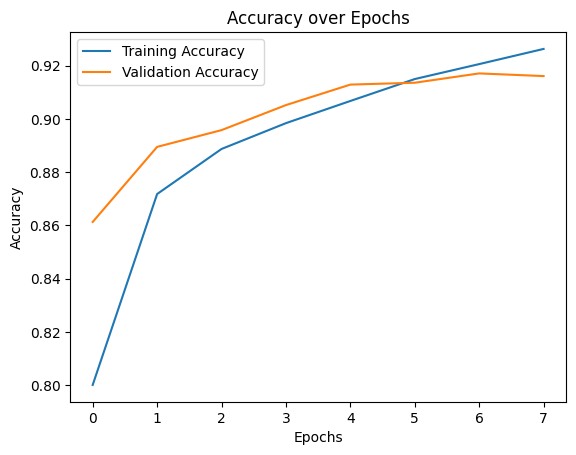

In [24]:
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

In [25]:
loss, accuracy = model.evaluate(x_test,y_test)
print("loss: ", loss)
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9134 - loss: 0.2374
loss:  0.2274884581565857
Accuracy: 0.916100025177002


In [26]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


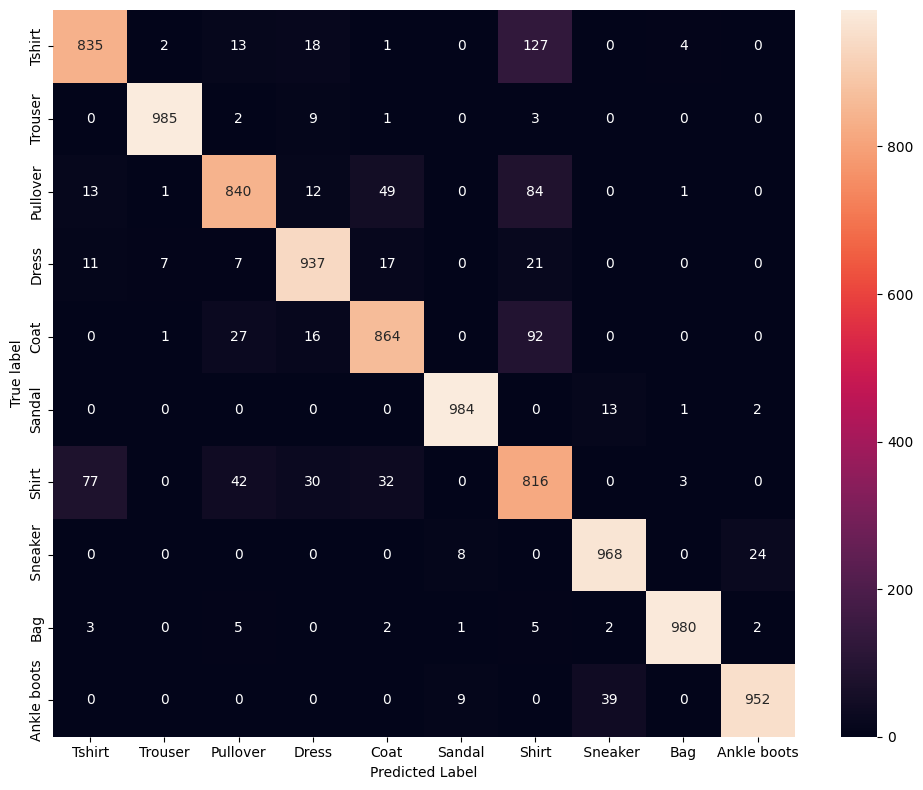

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True, fmt='d',xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()

# ***GOOGLE_STOCK***

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv("/content/drive/MyDrive/datasets/goog.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [32]:
df.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [34]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-12-19,790.219971,797.659973,786.270020,794.200012,1225900
1,2016-12-20,796.760010,798.650024,793.270020,796.419983,925100
2,2016-12-21,795.840027,796.676025,787.099976,794.559998,1208700
3,2016-12-22,792.359985,793.320007,788.580017,791.260010,969100
4,2016-12-23,790.900024,792.739990,787.280029,789.909973,623400


In [35]:
df.sort_values('Date', inplace=True)

In [57]:
cols = df.columns[1:]
cols
data_cols = df[cols].values

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data_cols = mms.fit_transform(data_cols)
data_cols


array([[0.15673043, 0.2107044 , 0.20678024, 0.27870496, 0.2312416 ],
       [0.24656614, 0.22472382, 0.29804489, 0.30635093, 0.11579351],
       [0.23392901, 0.19677141, 0.21760105, 0.28318798, 0.22464018],
       [0.18612623, 0.1492492 , 0.23689754, 0.24209223, 0.13268087],
       [0.16607182, 0.14103599, 0.21994854, 0.22527981, 0.        ],
       [0.16304941, 0.21353663, 0.22486319, 0.24570341, 0.06359624],
       [0.2045332 , 0.16213469, 0.16675407, 0.16475695, 0.19547112],
       [0.06208818, 0.04460442, 0.11095187, 0.13661236, 0.04559585],
       [0.05412092, 0.        , 0.        , 0.        , 0.43630781],
       [0.        , 0.09699768, 0.07027398, 0.17833138, 0.39136442],
       [0.13118116, 0.1212121 , 0.16623205, 0.18779601, 0.16964114],
       [0.09986292, 0.16567476, 0.19048298, 0.27646347, 0.26559202],
       [0.22596174, 0.35570655, 0.28414606, 0.42752207, 0.38269046],
       [0.37898394, 0.38496143, 0.4226863 , 0.43374872, 0.24908847],
       [0.39903835, 0.37312345, 0.

In [53]:
def generate_seq_data(data,seq_len):
  l = len(data)
  x = []
  y = []
  for i in range(l-seq_len):
    x.append(data[i:i+seq_len])
    y.append(data[i+seq_len][3])
  return np.array(x), np.array(y)

In [54]:
seq_len = 10
x, y = generate_seq_data(data_cols,seq_len)

In [55]:
y

array([0.18779601, 0.27646347, 0.42752207, 0.43374872, 0.41058501,
       0.44943925, 0.43013678, 0.44906604, 0.4083435 , 0.42652559,
       0.37801975, 0.41344979, 0.5914072 , 0.64819422, 0.79514303,
       0.75130792, 0.64122041, 0.37982571, 0.31095859, 0.29732258,
       0.33262797, 0.36948926, 0.36762172, 0.43773312, 0.4552927 ,
       0.4699875 , 0.52117039, 0.59053537, 0.60560414, 0.58729739,
       0.6518054 , 0.70049824, 0.74520517, 0.73399766, 0.74109613,
       0.70759672, 0.71556701, 0.63997538, 0.7897882 , 0.73237866,
       0.7130762 , 0.69688705, 0.74831849, 0.79140719, 0.8326276 ,
       0.88953927, 0.91805706, 0.91905354, 0.93872997, 0.95840639,
       1.        ])

In [56]:
train_size = 0.8
data_cols_len =len(data_cols)
split_len = int(data_cols_len * train_size)

x_train = x[:split_len]
y_train = y[:split_len]

x_test = x[split_len:]
y_test = y[split_len:]

In [58]:
n_features = len(cols)
input_shape = (seq_len,n_features)
input_shape

(10, 5)

In [61]:
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM

model  = Sequential()
model.add(Input(shape=input_shape))
model.add(LSTM(units=64))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation="relu"))

model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,817 (136.00 KB)

 Trainable params: 34,817 (136.00 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3528 - mean_squared_error: 0.3528 - val_loss: 0.7022 - val_mean_squared_error: 0.7022
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2581 - mean_squared_error: 0.2581 - val_loss: 0.5129 - val_mean_squared_error: 0.5129
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1841 - mean_squared_error: 0.1841 - val_loss: 0.3576 - val_mean_squared_error: 0.3576
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - loss: 0.1245 - mean_squared_error: 0.1245 - val_loss: 0.2302 - val_mean_squared_error: 0.2302
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.1261 - val_mean_squared_error: 0.1261
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - loss: 0.0426 - mean_squared_error: 0.0426 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0075 - val_mean_squa

In [63]:
loss, metric  = model.evaluate(x_test, y_test)
print(f"LOSS: {loss}\nMETRIC: {metric}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0042 - mean_squared_error: 0.0042
LOSS: 0.004240271169692278
METRIC: 0.004240271169692278


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


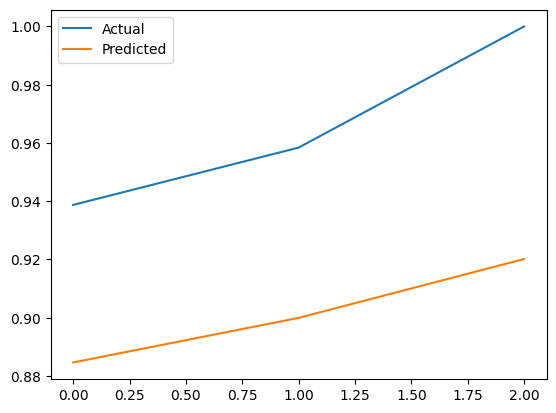

In [65]:
y_pred = model.predict(x_test)

plt.plot(y_test, label = "Actual")
plt.plot(y_pred, label = "Predicted")
plt.legend()
plt.show()


In [67]:
print(f"Actual: {y_test[0]}")
print(f"Predict: {y_pred[0][0]}")

Actual: 0.9387299659372292
Predict: 0.8846277594566345
